# CSC223 Final Project

### Introduction

The main objective of this project is to figure out what factors impact attendance the most for MLB teams. The dataset named "detailedstandings.csv" contains standings data from the 2022 MLB season. The second dataset named "teaminfo.csv" contains data on attendance, notable players, payroll, and more. Lastly, the dataset named "mlbteams.csv" gives the league, division, and team name.

*referenced past assignments and code examples given throughout the project. Any reference from outside the class will be shown in the cell where it was referenced

#### Links

detailedstandings.csv: https://www.baseball-reference.com/leagues/majors/2022-standings.shtml ("Major League Baseball Detailed Standings")

Citation: Sports Reference LLC. "2022 Major League Baseball Standings" Baseball-Reference.com - Major League Statistics and Information. https://www.baseball-reference.com/. (5/3/2023)

teaminfo.csv: https://www.baseball-reference.com/leagues/majors/2022-misc.shtml ("Miscellaneous Team Info")

Citation: Sports Reference LLC. "2022 Major League Baseball Attendance & Team Age" Baseball-Reference.com - Major League Statistics and Information. https://www.baseball-reference.com/. (5/3/2023)

mlbteams.csv: https://kuvapcsitrd01.kutztown.edu/~carelli/website/courses/csc223/listExamples.php?dirname=Examples&title=Code%20Examples&location=/export/home/public/carelli/csc223/Examples ("mlbteams.csv (download)")

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

detailed = pd.read_csv("detailedstandings.csv")
info = pd.read_csv("teaminfo.csv")
teams = pd.read_csv("mlbteams.csv")

# ---------------------------------------------------------------------------------------------------------------

### Attendance & Win Percentage (Quantitative)
   First, a dataframe was created using the dataset "info", and used the team names and total attendance. The data needed to be sorted from highest to lowest, then it was used to output the top five teams with the highest total attendance and lowest total attendance. The Dodgers had the highest attendance with about 3.8 million, while the Athletics had the least attendance with not even 800 thousand. A horizontal bar chart was then created to show all of the teams compared together. 
   
   Then, another dataframe was created using the dataset "detailed", and used the team names and win percentage from it. The dataframe was then used to show the five best and worst records from MLB, while the horizontal bar chart shows every team. The data was already sorted from best to worst win percentage and also includes the average of all teams (50%). The Dodgers ended the season as the best team in baseball with a win percentage of 68.5% and the Nationals were the worst team with 34%.
   
   Together the two top and bottom five tables, along with the two bar charts can help find a relationship between how a team performs and how many people show up to their games. Three out of the five top teams in attendance were also in the top for record, while the same can be said for the bottom teams in both categories. The other two teams in the top five for attendance that were not in the top five for win percentage were the Cardinals and the Padres. The reason the Cardinals would have that high attendance would be that they were just outside of the top five records at number six. The Padres were well within the top ten records, which explains the high attendance for them as well. For the other two teams that were in the top five for win percentage, but not attendance almost mirrors what was just stated. The Astros were the number six team in attendance and the Mets were eleventh in attendance. 

5 BEST ATTENDANCE
                     Attendance
Tm                             
Los Angeles Dodgers     3861408
St. Louis Cardinals     3320551
New York Yankees        3136207
Atlanta Braves          3129931
San Diego Padres        2987470

5 WORST ATTENDANCE
                    Attendance
Tm                            
Kansas City Royals     1277686
Pittsburgh Pirates     1257458
Tampa Bay Rays         1128127
Miami Marlins           907487
Oakland Athletics       787902


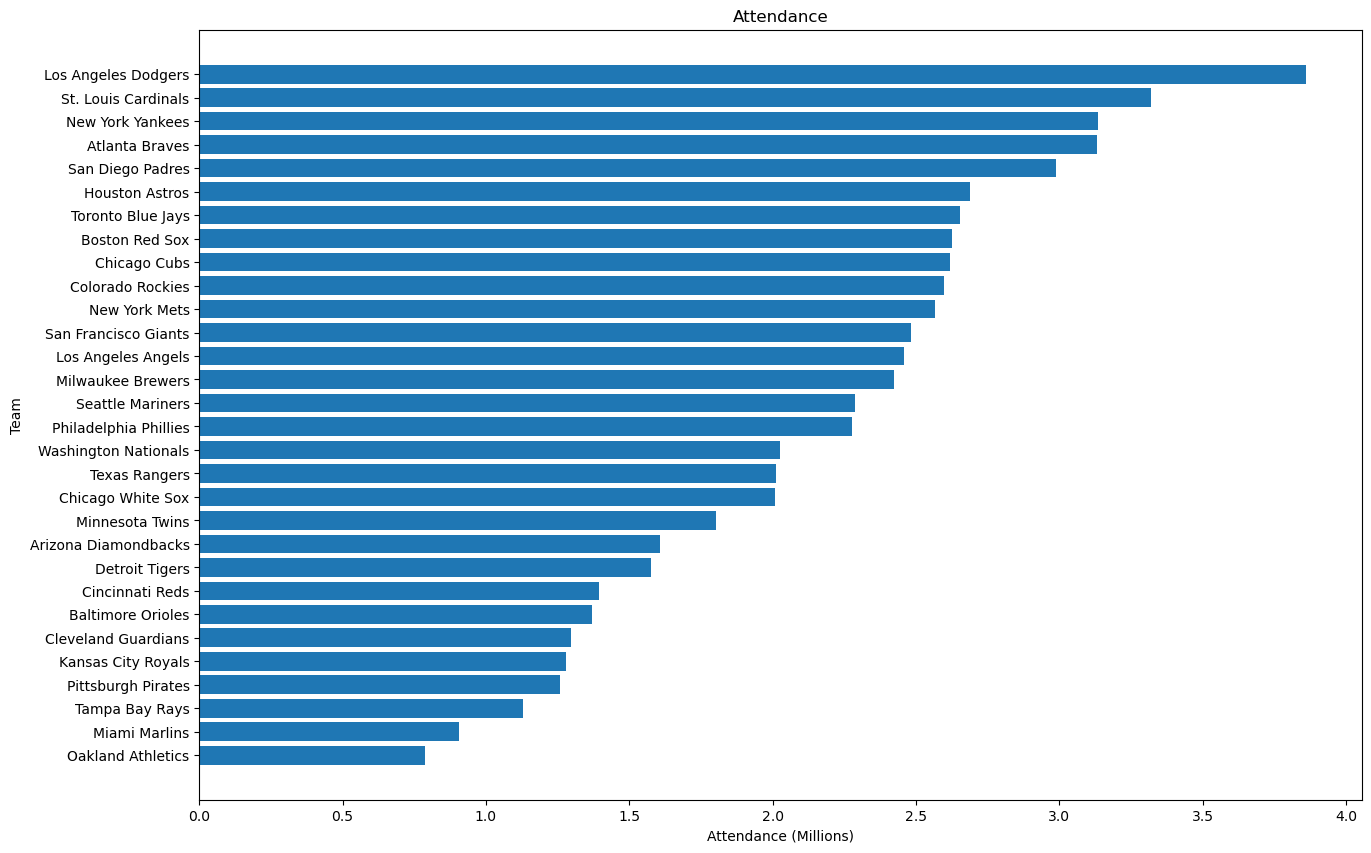

5 BEST WIN PERCENTAGE
                      W-L%
Tm                        
Los Angeles Dodgers  0.685
Houston Astros       0.654
Atlanta Braves       0.623
New York Mets        0.623
New York Yankees     0.611

5 WORST PERCENTAGE
                       W-L%
Tm                         
Kansas City Royals    0.401
Pittsburgh Pirates    0.383
Cincinnati Reds       0.383
Oakland Athletics     0.370
Washington Nationals  0.340


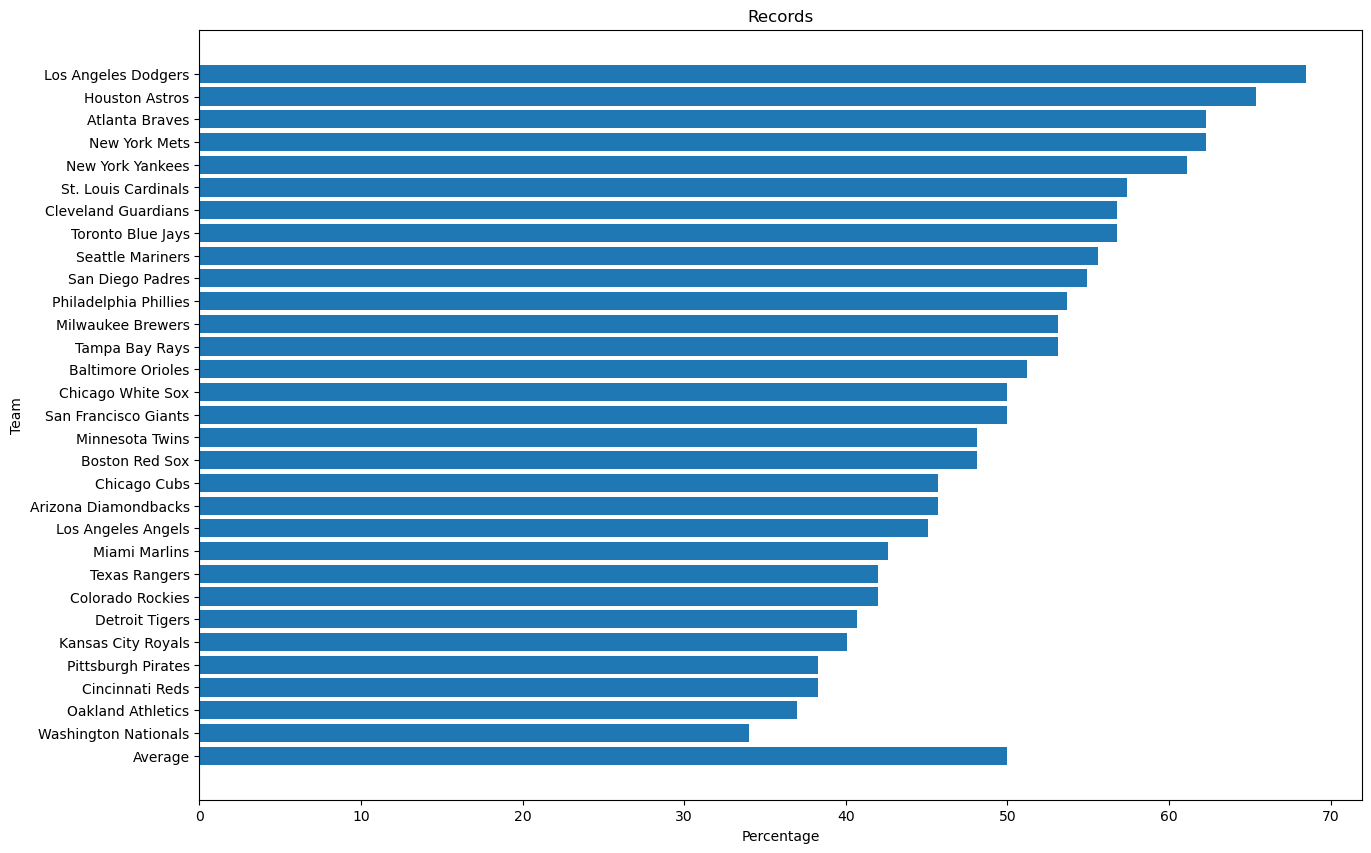

In [2]:
#creates a dataframe with team name and total attendance, then outputs the top 5 and bottom 5 teams
totalAttend = info[['Tm', 'Attendance']]
totalAttend = totalAttend.set_index(['Tm']).sort_values('Attendance', ascending = False)
print("5 BEST ATTENDANCE")
print(totalAttend[0:5])
print()
print("5 WORST ATTENDANCE")
print(totalAttend[25:30])

#creates a horizontal bar chart of all 30 teams and their total attendance for the year
totalAttend = totalAttend.reset_index()
fig, ax = plt.subplots(figsize=(15,10))
name1 = totalAttend['Tm']
attend = totalAttend['Attendance'] / 1000000
plt.title('Attendance')
plt.xlabel('Attendance (Millions)')
plt.ylabel('Team')
plt.barh(name1, attend)
plt.gca().invert_yaxis()
plt.show()

#creates a dataframe with team name and win loss percentage, then outputs the top 5 and bottom 5 teams
records = detailed[['Tm', 'W-L%']]
records = records.set_index('Tm')
print("5 BEST WIN PERCENTAGE")
print(records[0:5])
print()
print("5 WORST PERCENTAGE")
print(records[25:30])

#creates horizontal bar chart of all 30 teams and their win percentage
records = records.reset_index()
fig, ax = plt.subplots(figsize=(15, 10))
name2 = records['Tm']
WL = records['W-L%'] * 100
plt.title('Records')
plt.xlabel('Percentage')
plt.ylabel('Team')
plt.barh(name2, WL)
plt.gca().invert_yaxis()
plt.show()

# ---------------------------------------------------------------------------------------------------------------

### Attendance by Division (Categorical)
Two new dataframes were created using the existing "info" and "teams'' datasets. One takes the team names and attendance, while the other takes the league, division, and team names. They were then merged together and grouped to show the total attendance of every division from each league. The following pie chart helps to show the percentage of total attendance that each division brought in. The National League West was able to bring in the most attendance out of every division with 21.0%, while the American League Central brought in the least with 12.3%. The other four remaining divisions were within 1.2% of each other. The National League West was home to two of the top five teams in attendance for the year so it is no surprise that the division ended with the most attendance. When it comes to the American Central it is a bit more of a surprise. They only have one team in the bottom five of attendance, but the highest team in their division came out at nineteenth on the list. 

                   Attendance
League   Division            
American Central      7959587
         East        10911620
         West        10232989
National Central     11012979
         East        10905292
         West        13534191


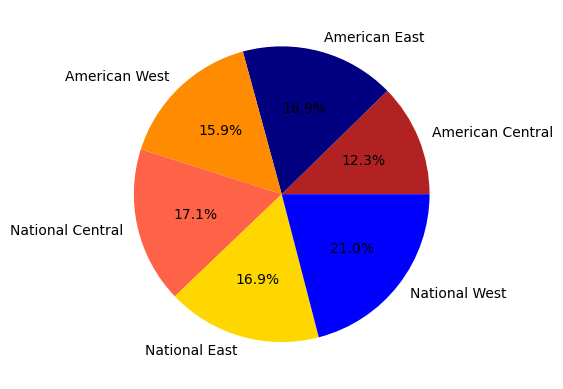

In [3]:
#creates dataframe for attendance by division
attendance = info[['Tm', 'Attendance']]
divisions = teams[['League', 'Division', 'Team']]
attendanceDiv = pd.merge(divisions, attendance, left_on = "Team", right_on = "Tm")
attendanceDiv = attendanceDiv.drop('Tm', axis = 1)
attendanceDiv = attendanceDiv.set_index(['League', 'Division', 'Team'])
attendanceDiv = attendanceDiv.groupby(['League', 'Division']).sum()
print(attendanceDiv)

#creates pie chart
#referenced: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
#referenced: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
fig, ax = plt.subplots()
sizes = attendanceDiv['Attendance']
labels = ['American Central', 'American East', 'American West', 'National Central', 'National East', 'National West']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['firebrick', 'navy', 'darkorange', 'tomato', 'gold', 'blue'])
#tried to make the colors in some way match the division leader's colors
plt.show()

# ---------------------------------------------------------------------------------------------------------------

### Win Percentage & Notable Players (Groupby)
Two dataframes were created with one focusing on win percentage by division and the other focusing on total allstars per division. The win percentage dataframe was calculated using the mean of every team in that division and the allstars dataframe was calculated using the sum of every team in that division. Tables were then output for each. What can be seen from the win percentage table is not much. What it really shows is that the bad teams seem to outweigh the good teams and bring the percentage down. What can be concluded from this table though is that even if a division is considered to be bad, they can still bring in a lot of attendance. For example, the National League Central has the worst average win percentage, but they have the second best attendance according to the pie chart above. This means that even though the team might be bad, there is still another factor that is bringing in the attendance. The next table to look at is the allstars one. Now it must be noted when talking about this table that every team in the MLB is to have at least one allstar. There is a bit more of a correlation between this table and the pie chart with the American League Central having the least amount of allstars and also having the least amount of attendance. The American and National League East both have the first and second highest number of allstars respectively, which shows that there is a lot of competitiveness between the top teams of each division. If the focus is put on the American League East, it can be seen that three of their five teams are within the top eight of total attendance, but the other two are within the bottom five. That must mean that there is a factor that makes it so attendance is low for teams even if they are doing well and have some of the best players in the league.

In [4]:
#creates a dataset of win percentage by divsion (mean)
winP = detailed[['Tm', 'W-L%']]
winP = pd.merge(divisions, winP, left_on = "Team", right_on = "Tm")
winP = winP.drop('Tm', axis = 1)
winP = winP.set_index(['League', 'Division', 'Team'])
winP = winP.groupby(['League', 'Division']).mean()
print(winP)
print()

#creates a dataset of notable players
notable = info[['Tm', '#A-S']]
notableDiv = pd.merge(divisions, notable, left_on = "Team", right_on = "Tm")
notableDiv = notableDiv.drop('Tm', axis = 1)
notableDiv = notableDiv.set_index(['League', 'Division', 'Team'])
notableDiv = notableDiv.groupby(['League', 'Division']).sum()
print(notableDiv)

                     W-L%
League   Division        
American Central   0.4714
         East      0.5406
         West      0.4902
National Central   0.4656
         East      0.5098
         West      0.5222

                   #A-S
League   Division      
American Central     10
         East        17
         West        12
National Central     12
         East        15
         West        13


# ---------------------------------------------------------------------------------------------------------------

### Win Percentage, Attendance, Payroll (Merging)
One dataframe was created by merging two dataframes together. The first of the two dataframe created shows the team names, total attendance, and payroll. The second dataframe was one that was previously created and shows the team names and win percentage. Merging these dataframes together allows for a comparison between win percentage, attendance, and payroll. A recurring theme that can be seen throughout this project is that the Dodgers are doing everything right. They have the highest payroll, attendance, and win percentage. So that must mean that the more money a team pays the better they are and more attendance they bring in right? Unfortunately it is not that easy, for the most part. The second to last team in payroll is the Orioles. They were in the bottom seven for attendance, but have a pretty decent win percentage of 51.2% in a competitive division. So even though they are a good team without spending a lot of money, they cannot bring in attendance. There are plenty of teams above them in payroll that have a worse win percentage but better attendance. To go along with this the all six of the bottom teams in payroll were within the bottom seven of total attendance. What does that show? That money matters. 

In [5]:
#creates dataframe of teams, win percentage, and payroll
#referenced: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
#referenced: https://stackoverflow.com/questions/63210016/dataframe-sort-values-only-looks-at-first-digit-rather-then-entire-number
payroll = info[['Tm', 'Attendance', 'Est. Payroll']]
commitment = pd.merge(records, payroll)
commitment['Est. Payroll'] = commitment['Est. Payroll'].str.replace('$', '', regex = True)
commitment['Est. Payroll'] = commitment["Est. Payroll"].astype('int')
commitment = commitment.set_index(['Tm']).sort_values('Est. Payroll', ascending = False)
print(commitment)

                        W-L%  Attendance  Est. Payroll
Tm                                                    
Los Angeles Dodgers    0.685     3861408     261180131
New York Yankees       0.611     3136207     238950714
New York Mets          0.623     2564737     237473333
Philadelphia Phillies  0.537     2276736     209488461
Boston Red Sox         0.481     2625089     191920000
Los Angeles Angels     0.451     2457461     177063095
San Diego Padres       0.549     2987470     173600824
Atlanta Braves         0.623     3129931     171075000
Toronto Blue Jays      0.568     2653830     165705857
Houston Astros         0.654     2688998     164789600
Chicago White Sox      0.500     2009359     163958334
St. Louis Cardinals    0.574     3320551     156814666
San Francisco Giants   0.500     2482686     134929667
Chicago Cubs           0.457     2616780     131085000
Milwaukee Brewers      0.531     2422420     128421127
Washington Nationals   0.340     2026401     125051666
Texas Rang

# ---------------------------------------------------------------------------------------------------------------

### Conclusion
So what can be concluded from this project? That all factors will and can have an impact on attendance. They might not be drastic changes, but there will be an impact. The least impactful factor is allstars. While having a couple good players for that year is better for the team's chance at winning, it does not really translate to bringing in the crowds if the owners of the team are not committed to putting money on the line to win. Speaking of winning, while not as bad as allstars, it is also not the most impactful reason teams are bringing in attendance. There are plenty of teams that bring in good attendance regardless of what their records are, so just because the team is good doesn't mean they are guaranteed to have good attendance. The Guardians and Orioles both ended the season with respectable win percentages, but were in the bottom of attendance, while teams like the Dodgers and Yankees also had good win percentages and good attendance. The biggest difference in these teams were their payrolls. If the owners care enough to spend money on their teams they see a good amount of attendance throughout the year. The team does not necessarily need to be good though. As long as the fans of those teams see commitment to try and better the team they will show up, and the same can be said the other way around. Teams do not need the best players to win, but when money is not spent on those teams to get the best players, the fans are not always interested. In the sport of baseball winning is everything and it is what gets teams to the final goal, but if owners want to have good attendance for their teams, which inturn makes them more money, the best solution is to just keep spending money.